In [1]:
import glob
import os
import pandas as pd
import numpy as np

files_path = '/Users/annadugoul/Documents/SCData/SC5118'
read_files = glob.glob(os.path.join(files_path, "*.dat"))

np_array_values = []
for files in read_files:
    DailyP5118_data = pd.read_fwf(files, header=0)
    np_array_values.append(DailyP5118_data)
    DailyP5118_data.columns = ['year', 'month', 'day', 'Pinmm']
    print(files)

/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56198.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56167.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56173.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56371.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56172.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56199.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57318.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57324.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56038.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57326.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56158.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_57508.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56164.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56399.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56373.dat
/Users/annadugoul/Documents/SCData/SC5118/DailyP5118_56

In [2]:
np_array_values

[       year  month  day  Pinmm
 0      1951      1    1 -999.0
 1      1951      1    2 -999.0
 2      1951      1    3 -999.0
 3      1951      1    4 -999.0
 4      1951      1    5 -999.0
 ...     ...    ...  ...    ...
 24832  2018     12   27    3.7
 24833  2018     12   28    7.0
 24834  2018     12   29 -999.0
 24835  2018     12   30    0.0
 24836  2018     12   31    0.4
 
 [24837 rows x 4 columns],
        year  month  day  Pinmm
 0      1951      1    1 -999.0
 1      1951      1    2 -999.0
 2      1951      1    3 -999.0
 3      1951      1    4 -999.0
 4      1951      1    5 -999.0
 ...     ...    ...  ...    ...
 24832  2018     12   27    0.0
 24833  2018     12   28    0.0
 24834  2018     12   29    0.0
 24835  2018     12   30    0.0
 24836  2018     12   31    0.0
 
 [24837 rows x 4 columns],
        year  month  day  Pinmm
 0      1951      1    1 -999.0
 1      1951      1    2 -999.0
 2      1951      1    3 -999.0
 3      1951      1    4 -999.0
 4      1951  

In [3]:
merge_values = np.vstack(np_array_values)
DailyP5118_data = pd.DataFrame(merge_values,
                columns=('year', 'month', 'day', 'Pinmm'))
DailyP5118_data

,year,month,day,Pinmm
0,1951.0,1.0,1.0,-999.0
1,1951.0,1.0,2.0,-999.0
2,1951.0,1.0,3.0,-999.0
3,1951.0,1.0,4.0,-999.0
4,1951.0,1.0,5.0,-999.0
...,...,...,...,...
3874567,2018.0,12.0,27.0,0.2
3874568,2018.0,12.0,28.0,0.3
3874569,2018.0,12.0,29.0,1.9
3874570,2018.0,12.0,30.0,0.0


In [4]:
import pandas as pd
import os

path = r'/Users/annadugoul/Documents/SCData/SC5118'
files = os.listdir(path)

DailyP5118_data = pd.DataFrame()

for file in files:
    df_station = pd.read_fwf(path + '//' + file)
    df_station['Station'] = file
    DailyP5118_data = DailyP5118_data.append(df_station)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station
0,1951,1,1,-999.0,DailyP5118_56198.dat
1,1951,1,2,-999.0,DailyP5118_56198.dat
2,1951,1,3,-999.0,DailyP5118_56198.dat
3,1951,1,4,-999.0,DailyP5118_56198.dat
4,1951,1,5,-999.0,DailyP5118_56198.dat
...,...,...,...,...,...
24832,2018,12,27,0.2,DailyP5118_57328.dat
24833,2018,12,28,0.3,DailyP5118_57328.dat
24834,2018,12,29,1.9,DailyP5118_57328.dat
24835,2018,12,30,0.0,DailyP5118_57328.dat


In [5]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')
        
season_list = []
hemisphere = 'Northern'
for month in DailyP5118_data['MM']:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
DailyP5118_data['Season'] = season_list
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station,Season
0,1951,1,1,-999.0,DailyP5118_56198.dat,Winter
1,1951,1,2,-999.0,DailyP5118_56198.dat,Winter
2,1951,1,3,-999.0,DailyP5118_56198.dat,Winter
3,1951,1,4,-999.0,DailyP5118_56198.dat,Winter
4,1951,1,5,-999.0,DailyP5118_56198.dat,Winter
...,...,...,...,...,...,...
24832,2018,12,27,0.2,DailyP5118_57328.dat,Winter
24833,2018,12,28,0.3,DailyP5118_57328.dat,Winter
24834,2018,12,29,1.9,DailyP5118_57328.dat,Winter
24835,2018,12,30,0.0,DailyP5118_57328.dat,Winter


In [6]:
cols_to_check = ['Station']
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'.dat':''}, regex=True)
DailyP5118_data[cols_to_check] = DailyP5118_data[cols_to_check].replace({'DailyP5118_':''}, regex=True)
DailyP5118_data = pd.DataFrame(DailyP5118_data)
DailyP5118_data

,YYYY,MM,DD,Pinmm,Station,Season
0,1951,1,1,-999.0,56198,Winter
1,1951,1,2,-999.0,56198,Winter
2,1951,1,3,-999.0,56198,Winter
3,1951,1,4,-999.0,56198,Winter
4,1951,1,5,-999.0,56198,Winter
...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,Winter
24833,2018,12,28,0.3,57328,Winter
24834,2018,12,29,1.9,57328,Winter
24835,2018,12,30,0.0,57328,Winter


In [7]:
DailyP5118_data.replace(-999, np.nan, inplace=True)
DailyP5118_data.replace(-99.9, np.nan, inplace=True)
DailyP5118_data.replace(999, np.nan, inplace=True)

In [8]:
DailyP5118_data.columns = ['year', 'month', 'day', 'Pinmm', 'Station', 'Season']

In [9]:
DailyP5118_data['Date']=pd.to_datetime(DailyP5118_data[['year','month','day']])
DailyP5118_data

,year,month,day,Pinmm,Station,Season,Date
0,1951,1,1,NaN,56198,Winter,1951-01-01
1,1951,1,2,NaN,56198,Winter,1951-01-02
2,1951,1,3,NaN,56198,Winter,1951-01-03
3,1951,1,4,NaN,56198,Winter,1951-01-04
4,1951,1,5,NaN,56198,Winter,1951-01-05
...,...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,Winter,2018-12-27
24833,2018,12,28,0.3,57328,Winter,2018-12-28
24834,2018,12,29,1.9,57328,Winter,2018-12-29
24835,2018,12,30,0.0,57328,Winter,2018-12-30


In [10]:
the_data = DailyP5118_data.drop(DailyP5118_data.index[0:17897])
the_data

,year,month,day,Pinmm,Station,Season,Date
17897,2000,1,1,0.0,56198,Winter,2000-01-01
17898,2000,1,2,0.0,56198,Winter,2000-01-02
17899,2000,1,3,0.0,56198,Winter,2000-01-03
17900,2000,1,4,0.0,56198,Winter,2000-01-04
17901,2000,1,5,0.0,56198,Winter,2000-01-05
...,...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,Winter,2018-12-27
24833,2018,12,28,0.3,57328,Winter,2018-12-28
24834,2018,12,29,1.9,57328,Winter,2018-12-29
24835,2018,12,30,0.0,57328,Winter,2018-12-30


In [18]:
the_data["season-year"] = the_data["year"].astype(str) + '-' + the_data["Season"]
the_data

/var/folders/04/cbsbnc0n1lq848b8fzgr55gm0000gn/T/ipykernel_2383/144414875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_data["season-year"] = the_data["year"].astype(str) + '-' + the_data["Season"]


,year,month,day,Pinmm,Station,Season,Date,season-year
17897,2000,1,1,0.0,56198,Winter,2000-01-01,2000-Winter
17898,2000,1,2,0.0,56198,Winter,2000-01-02,2000-Winter
17899,2000,1,3,0.0,56198,Winter,2000-01-03,2000-Winter
17900,2000,1,4,0.0,56198,Winter,2000-01-04,2000-Winter
17901,2000,1,5,0.0,56198,Winter,2000-01-05,2000-Winter
...,...,...,...,...,...,...,...,...
24832,2018,12,27,0.2,57328,Winter,2018-12-27,2018-Winter
24833,2018,12,28,0.3,57328,Winter,2018-12-28,2018-Winter
24834,2018,12,29,1.9,57328,Winter,2018-12-29,2018-Winter
24835,2018,12,30,0.0,57328,Winter,2018-12-30,2018-Winter


In [21]:
dSYYYY = the_data.groupby('season-year')['Pinmm'].mean()
dSYYYY = pd.DataFrame(dSYYYY)
dSYYYY = dSYYYY.rename({'Pinmm': 'Mean_S-YYYY'}, axis='columns')
dSYYYY

,Mean_S-YYYY
season-year,
2000-Autumn,2.239832
2000-Spring,1.599082
2000-Summer,5.828000
2000-Winter,0.405916
2001-Autumn,2.902919
...,...
2017-Winter,0.876671
2018-Autumn,2.603447
2018-Spring,2.679876


In [22]:
data_Station_SYYYY = pd.merge(the_data, dSYYYY, on=("season-year"))
data_Station_SYYYY

,year,month,day,Pinmm,Station,Season,Date,season-year,Mean_S-YYYY
0,2000,1,1,0.0,56198,Winter,2000-01-01,2000-Winter,0.405916
1,2000,1,2,0.0,56198,Winter,2000-01-02,2000-Winter,0.405916
2,2000,1,3,0.0,56198,Winter,2000-01-03,2000-Winter,0.405916
3,2000,1,4,0.0,56198,Winter,2000-01-04,2000-Winter,0.405916
4,2000,1,5,0.0,56198,Winter,2000-01-05,2000-Winter,0.405916
...,...,...,...,...,...,...,...,...,...
1082635,2018,11,26,0.0,57328,Autumn,2018-11-26,2018-Autumn,2.603447
1082636,2018,11,27,4.0,57328,Autumn,2018-11-27,2018-Autumn,2.603447
1082637,2018,11,28,0.0,57328,Autumn,2018-11-28,2018-Autumn,2.603447
1082638,2018,11,29,0.2,57328,Autumn,2018-11-29,2018-Autumn,2.603447


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Mean precipitation (mm/day)'),
 Text(0.5, 1.0, 'Mean precipitation in mm/day for every season of the years 2000 to 2018')]

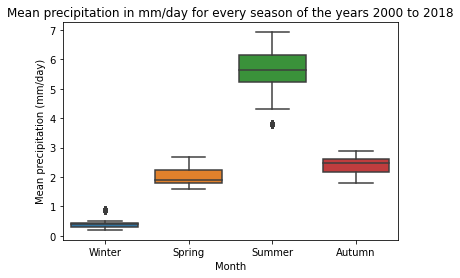

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(data=data_Station_SYYYY, x='Season', y='Mean_S-YYYY');
ax.set(xlabel='Month', ylabel='Mean precipitation (mm/day)', title='Mean precipitation in mm/day for every season of the years 2000 to 2018')

In [28]:
summerDataFrame = data_Station_SYYYY[data_Station_SYYYY['Season'] == 'Summer']
summerDataFrame

,year,month,day,Pinmm,Station,Season,Date,season-year,Mean_S-YYYY
28548,2000,6,1,0.0,56198,Summer,2000-06-01,2000-Summer,5.828000
28549,2000,6,2,0.0,56198,Summer,2000-06-02,2000-Summer,5.828000
28550,2000,6,3,0.3,56198,Summer,2000-06-03,2000-Summer,5.828000
28551,2000,6,4,0.0,56198,Summer,2000-06-04,2000-Summer,5.828000
28552,2000,6,5,29.7,56198,Summer,2000-06-05,2000-Summer,5.828000
...,...,...,...,...,...,...,...,...,...
1068439,2018,8,27,0.0,57328,Summer,2018-08-27,2018-Summer,6.925695
1068440,2018,8,28,0.0,57328,Summer,2018-08-28,2018-Summer,6.925695
1068441,2018,8,29,0.0,57328,Summer,2018-08-29,2018-Summer,6.925695
1068442,2018,8,30,0.0,57328,Summer,2018-08-30,2018-Summer,6.925695


In [29]:
newsummer = summerDataFrame[['season-year', 'Mean_S-YYYY']].copy()
newsummer

,season-year,Mean_S-YYYY
28548,2000-Summer,5.828000
28549,2000-Summer,5.828000
28550,2000-Summer,5.828000
28551,2000-Summer,5.828000
28552,2000-Summer,5.828000
...,...,...
1068439,2018-Summer,6.925695
1068440,2018-Summer,6.925695
1068441,2018-Summer,6.925695
1068442,2018-Summer,6.925695


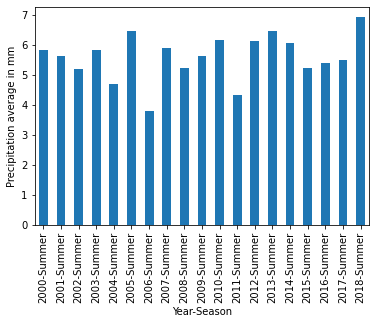

In [33]:
figsize=(20, 12)
out = '/Users/annadugoul/Documents/Data_Thesis/hist-mean_for_year-summer.png'
ax = newsummer.groupby(by=['season-year']).max().plot.bar(legend=False)
ax.set_ylabel("Precipitation average in mm")
ax.set_xlabel("Year-Season")
plt.savefig(out, bbox_inches = 'tight', transparent = False, facecolor = 'white')